<h1 align='center'>Mall Customer Segmentaion</h1>
<h2 align='center'>Internsavy</h2>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [13]:
data=pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [15]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [16]:
data.shape

(200, 5)

In [17]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

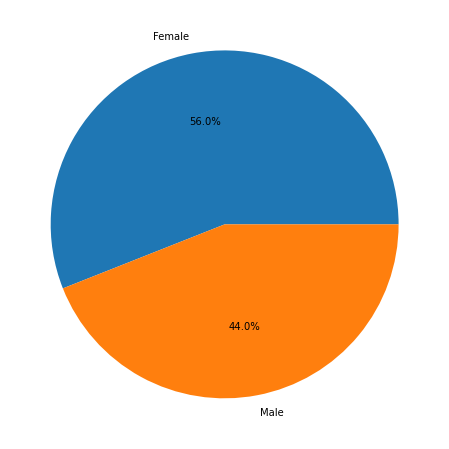

In [18]:
plt.figure(figsize=(18,8))
y=data['Genre'].value_counts()
plt.pie(y, labels=y.index, autopct="%1.1f%%")
plt.show()
# data["Genre"].value_counts().plot(kind="pie", autopct="%.2f%%")
# plt.show()


In [19]:
cols = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

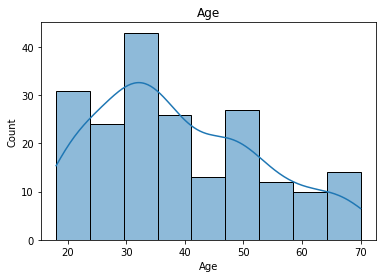

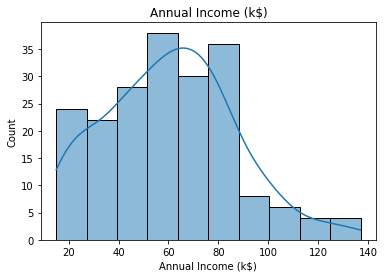

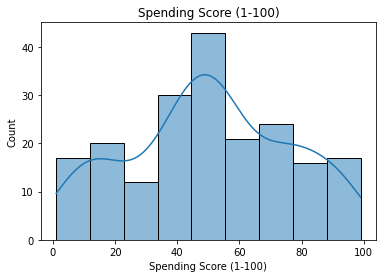

In [20]:
for col in cols:
    plt.figure()
    plt.title(col)
    sns.histplot(data=data, x=col, kde=True)
    plt.show()

### Using Aglomerative Clustering

In [21]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(column):
    le = LabelEncoder().fit(column)
    print(column.name, le.classes_)
    return le.transform(column)

In [22]:
data["Genre"] = label_encoder(data["Genre"])

Genre ['Female' 'Male']


In [23]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [24]:
data.drop("CustomerID", axis=1, inplace=True)


In [25]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=5)
clusters = agglo.fit_predict(data)

In [26]:
data['cluster'] = pd.DataFrame(clusters)

In [27]:
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,4
1,1,21,15,81,3
2,0,20,16,6,4
3,0,23,16,77,3
4,0,31,17,40,4


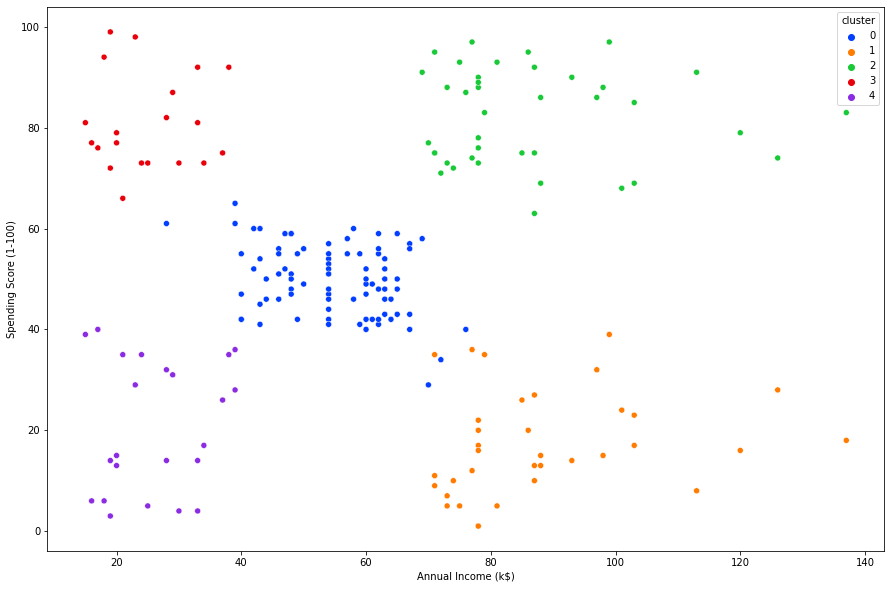

In [28]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=data, x="Annual Income (k$)", y="Spending Score (1-100)", hue=data["cluster"], palette=sns.color_palette('bright', 5))
plt.show()